In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("corporate_stress_dataset.csv")
data.head(5)

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [4]:
data=data.drop("ID",axis=1)

In [6]:
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["Marital_Status"]=le.fit_transform(data["Marital_Status"])
data["Job_Role"]=le.fit_transform(data["Job_Role"])
data["Health_Issues"]=le.fit_transform(data["Health_Issues"])
data["Company_Size"]=le.fit_transform(data["Company_Size"])
data["Department"]=le.fit_transform(data["Department"])
data["Burnout_Symptoms"]=le.fit_transform(data["Burnout_Symptoms"])
data["Location"]=le.fit_transform(data["Location"])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Gender                            50000 non-null  int64  
 2   Marital_Status                    50000 non-null  int64  
 3   Job_Role                          50000 non-null  int64  
 4   Experience_Years                  50000 non-null  int64  
 5   Monthly_Salary_INR                50000 non-null  float64
 6   Working_Hours_per_Week            50000 non-null  int64  
 7   Commute_Time_Hours                50000 non-null  float64
 8   Remote_Work                       50000 non-null  bool   
 9   Stress_Level                      50000 non-null  int64  
 10  Health_Issues                     50000 non-null  int64  
 11  Company_Size                      50000 non-null  int64  
 12  Depa

<Axes: >

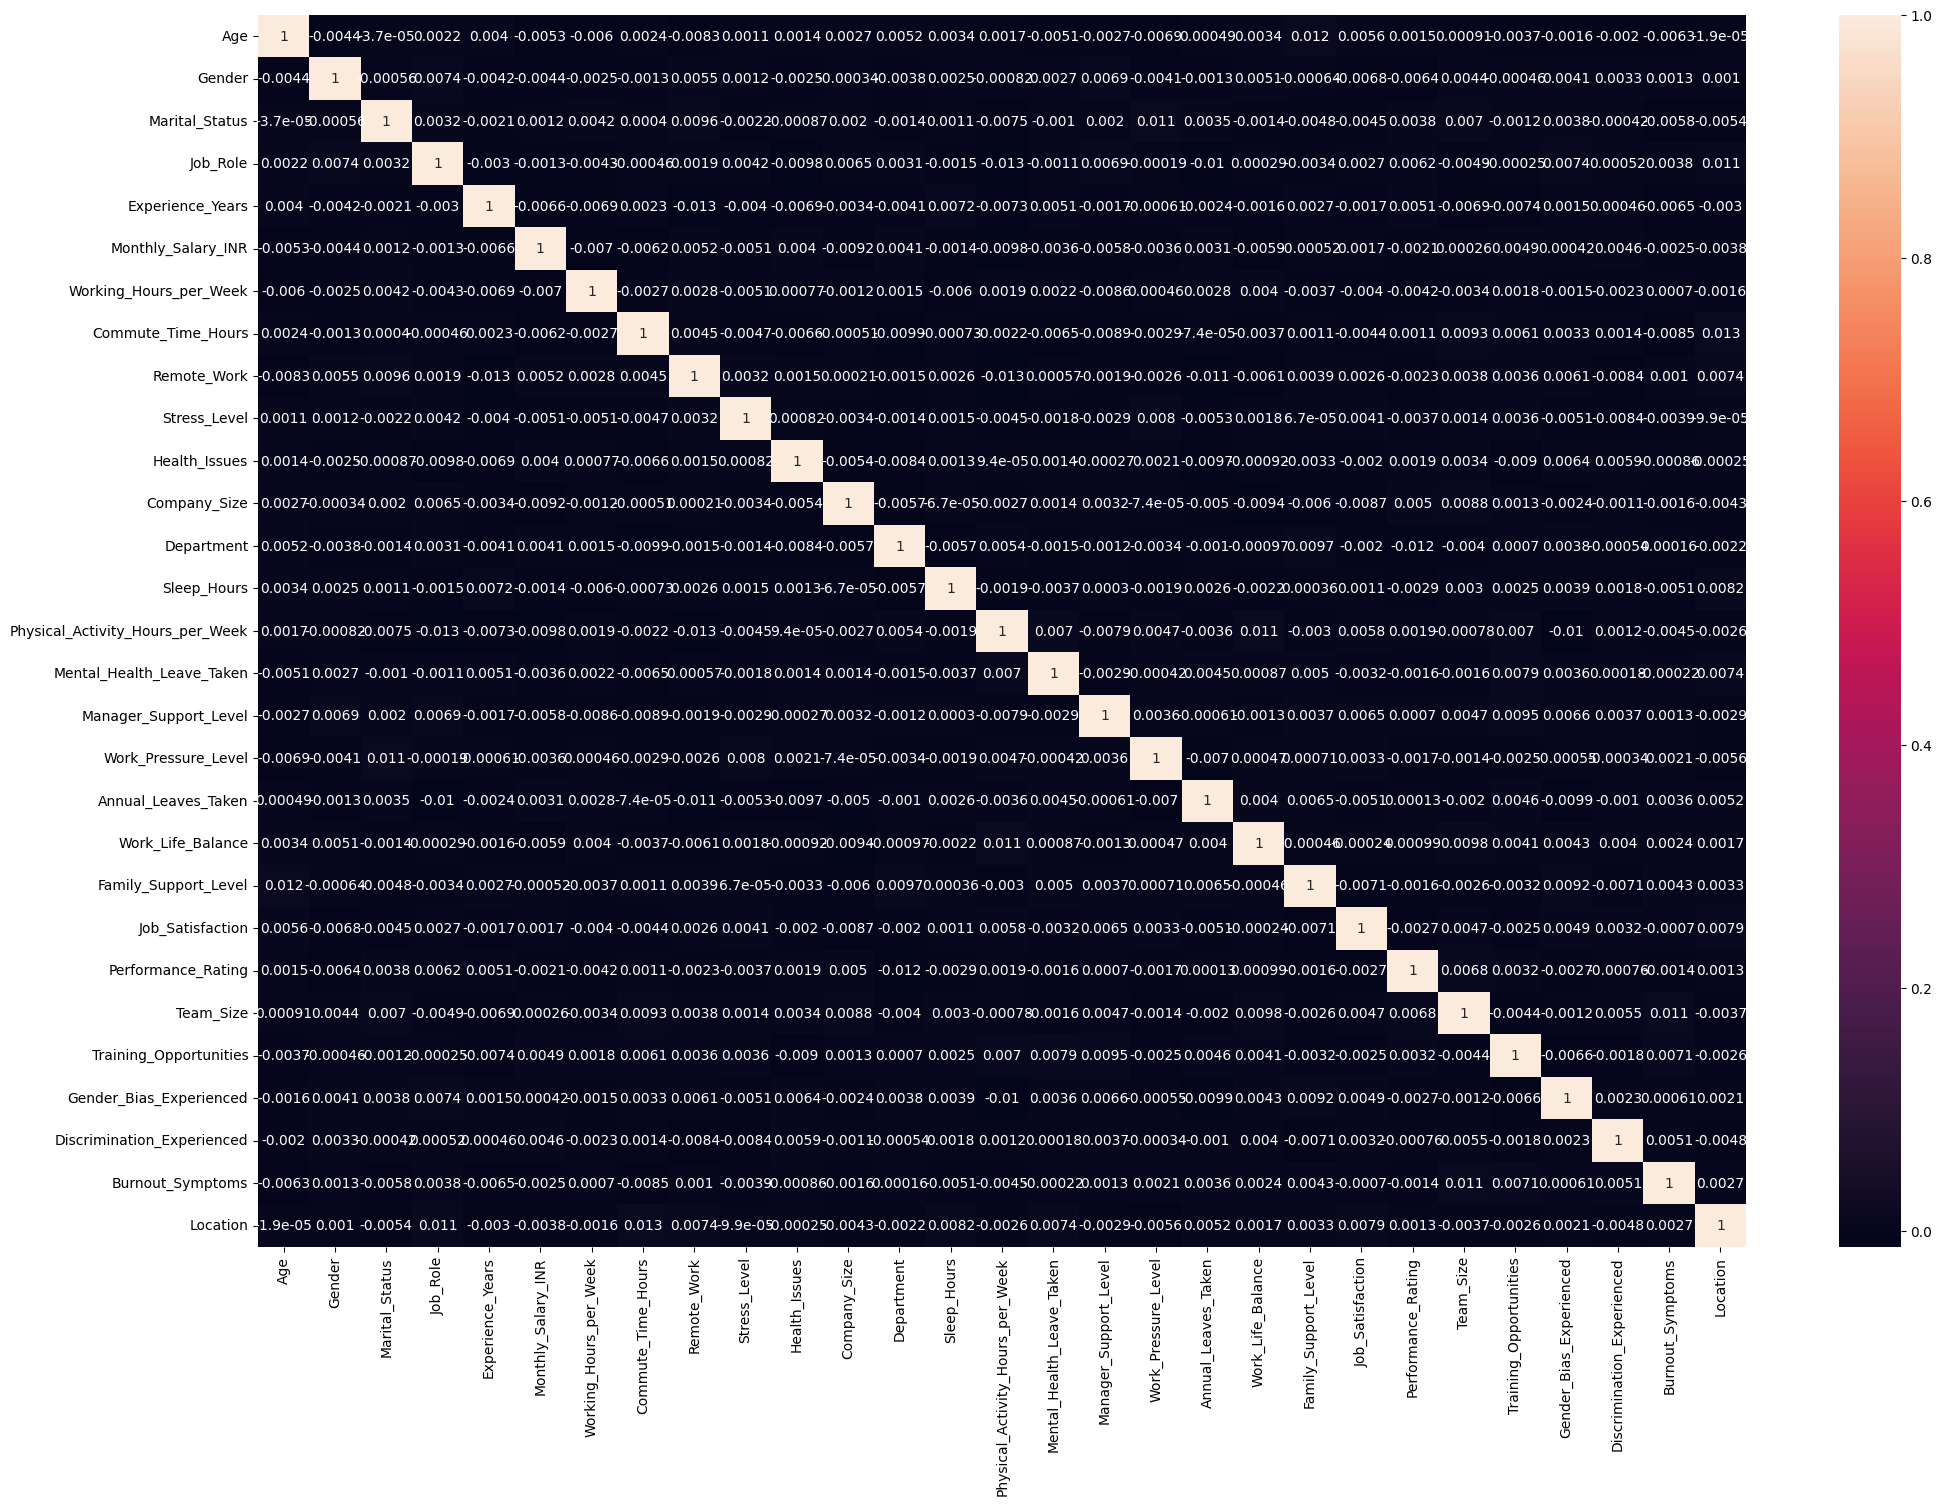

In [16]:
plt.figure(figsize=(24,16))
sns.heatmap(data.corr(),annot=True)

In [17]:
x=data.drop(["Stress_Level"],axis=1)
y=data["Stress_Level"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model={
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [21]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, x_train, x_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy*100,
        "Precision": precision*100,
        "Recall": recall*100,
        "F1-Score": f1*100
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,9.08,8.965982,9.08,8.551766
1,KNN,9.04,8.721342,9.04,7.804607
2,Decision Tree,9.07,9.083010,9.07,9.073148
3,Random Forest,8.95,8.992086,8.95,8.926547
4,XGBoost,8.88,8.882766,8.88,8.871626
